### TD_1:   First neural network for classifying images
---

Exe. 1

In [275]:
#run this only in GC 
try :
    %tensorflow_version 2.x
except Exception:
    pass

Exe. 2

In [276]:
#run this only on GC
from __future__ import absolute_import, division, print_function, unicode_literals

In [277]:
#cool library
import tensorflow as tf
from tensorflow import keras

#bboooooooo
import numpy as np
import matplotlib.pyplot as plt

Exe 3 

In [278]:
print(tf.__version__)

2.20.0


Exe 4 

In [279]:
data = keras.datasets.cifar10
cifar10_data = data.load_data()

Exe. 5 

In [280]:
print(f"lenght of cifar10_data :{len(cifar10_data)}\n")
print(f"shape of cifar10_data[0][0] :{cifar10_data[0][0].shape}\n")
print(f"shape of cifar10_data[0][1] :{cifar10_data[0][1].shape}\n")
print(f"type of cifar10_data :{type(cifar10_data)}\n")

lenght of cifar10_data :2

shape of cifar10_data[0][0] :(50000, 32, 32, 3)

shape of cifar10_data[0][1] :(50000, 1)

type of cifar10_data :<class 'tuple'>



50000 photos of 32x32x3 (3 for RGB) pixels

Exe. 6

In [295]:
(train_images, train_labels) , (test_images, test_labels)= cifar10_data


#will be usefull for later 

def ft_cifar10_data():
    
    data = keras.datasets.cifar10
    cifar10_data = data.load_data()
    (train_images, train_labels) , (test_images, test_labels)= cifar10_data
    test_images = test_images.astype("float32") / 255.0
    train_images = train_images.astype("float32") / 255.0  
    return (train_images, train_labels) , (test_images, test_labels)

Exe 7

In [296]:
print(train_images[0][1][1])
print(train_images[0].shape)

class_names = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
]

[0 0 0]
(32, 32, 3)


Exe 9

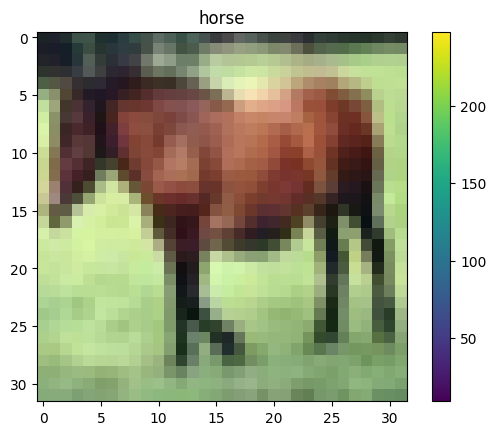

In [297]:
index = 7 
plt.figure()
plt.imshow(train_images[index])
plt.title(class_names[train_labels[index][0]])
plt.colorbar()
plt.grid(False)
plt.show()


Exe 10

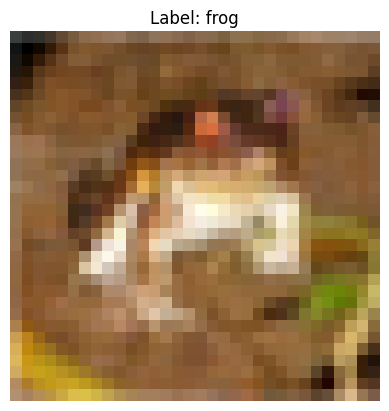

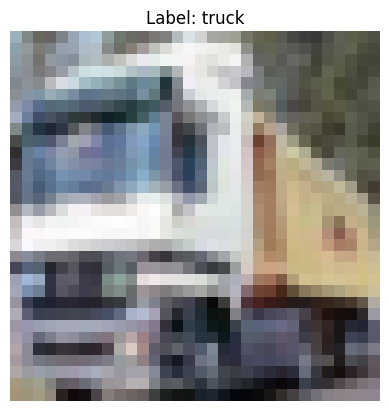

In [298]:
#utils 

def ft_showme(image, label=None,cmap=None):
    """
    image: numpy array (2D)
    cmap: 
    """
    plt.imshow(image)
    if label is not None:
        plt.title(f"Label: {label}")
    plt.axis("off")
    plt.show()
ft_showme(train_images[0], class_names[train_labels[0][0]],cmap='')
ft_showme(train_images[1],class_names[train_labels[1][0]],cmap='')


In [299]:
# plt.subplot()
# plt.xticks([])
# plt.yticks([])
# plt.imshow()
# plt.xlabel()

#what is this  ?? 

Exe 11 

Exe 12 

In [300]:

data = ft_cifar10_data()
(train_images, train_labels) , (test_images, test_labels) = data
def create_model(data):
    shape =data[0][0].shape[1:]
    model = keras.Sequential([
        keras.Input(shape= shape),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax')    
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = create_model(data)
model.save("init.keras")

Exe 14

In [301]:
#let's compile it :P
model.fit(train_images, train_labels, epochs=5)
model.save("my_model.keras")   # ou .h5

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3155 - loss: 1.9097
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3745 - loss: 1.7502
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3940 - loss: 1.6968
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4082 - loss: 1.6653
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4146 - loss: 1.6425


Exe 15

In [303]:
model= tf.keras.models.load_model("init.keras")

# model.load_weights("init.weights.h5")
predictions = model.predict(test_images)

print(predictions[:5])


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
[[0.03580777 0.05107925 0.03893022 0.16831651 0.05087575 0.05514684
  0.04208538 0.0921655  0.2715225  0.19407031]
 [0.05363947 0.07367352 0.02397869 0.21452811 0.03656418 0.03344432
  0.02530242 0.05043881 0.40385225 0.08457822]
 [0.0672039  0.07026856 0.03151472 0.22080515 0.05350013 0.07411455
  0.0296743  0.06367021 0.2814282  0.10782034]
 [0.04491315 0.04970493 0.02532861 0.21048908 0.04221957 0.03522346
  0.02916348 0.05377495 0.4063226  0.10286012]
 [0.04167654 0.07147931 0.03384221 0.19051795 0.04291833 0.06003146
  0.05402816 0.1251463  0.2812043  0.09915542]]


In [304]:
# DOn't execute (it will reset the weights)


Exe 16

In [305]:
model= tf.keras.models.load_model("my_model.keras")


predictions = model.predict(test_images)

index = 15;
#print(predictions[:index])
pre = np.argmax(predictions, axis=1)
## NEED TO MODIFY THE FOLLOWING LINE !! (just kidding hhh)
print(f"\npredicted labels : {pre[:index]}\n")
print(f"probability of predicted labels :")
for i in range(index):
    print(f"{predictions[i][pre[i]]:.3f}", end="\t")
print(f"\n\nreal labels : {test_labels[:index].flatten()}\n")
print("\nProbability of real label")
for i in range(index):
    print(f"{predictions[i][test_labels[i][0]]:.3f}", end="\t")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step

predicted labels : [1 9 8 8 4 6 3 4 4 1 8 9 7 7 1]

probability of predicted labels :
0.284	0.322	0.513	0.535	0.394	0.421	0.333	0.325	0.365	0.676	0.411	0.600	0.192	0.420	0.217	

real labels : [3 8 8 0 6 6 1 6 3 1 0 9 5 7 9]


Probability of real label
0.095	0.314	0.513	0.301	0.194	0.421	0.063	0.295	0.056	0.676	0.329	0.600	0.132	0.420	0.183	

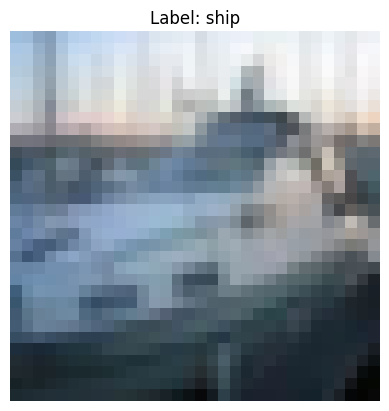

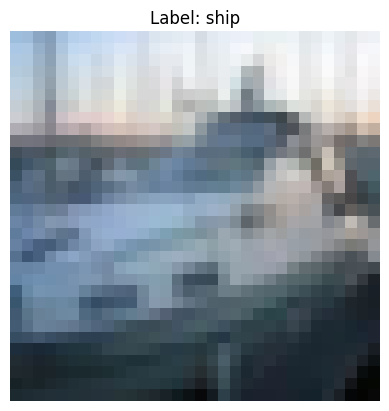

In [306]:
ft_showme(test_images[2], class_names[test_labels[2][0]],cmap='')
ft_showme(test_images[2], class_names[pre[2]],cmap='')


27
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step


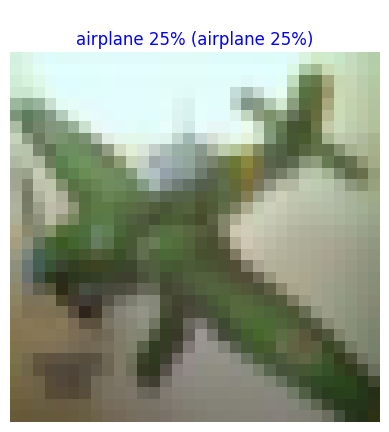

In [308]:
import random
def ft_check_prediction(path_to_model,class_names,data, id_image=None):
    """
    path of train_model is : "my_model.keras"
    path of init_model is : "init.keras"

    image.shape= (32, 32 , 3)
    the model is presume to be trained
    this function will predict the label of the input image 0_0

    predictions.shape = (10000, 10)
    """
    if id_image is None:
        id_image = random.randint(0, 100)

    print(id_image)
    model = tf.keras.models.load_model(path_to_model)
    (_, _) , ( test_images, test_labels) = data
    predictions = model.predict(test_images)                    #(10000, 10) pred of all images
    label_pred = np.argmax(predictions[id_image])               #label with max prob = int 
    probability_pred = predictions[id_image][label_pred]        #value of that prob
    label_real = test_labels[id_image][0]                       #same but for real
    probability_real = predictions[id_image][label_real]
    title = ("\n" + str(class_names[label_pred]) + " " + format(probability_pred*100, ".0f") +
      "% (" + str(class_names[label_real]) + " " + format(probability_real*100, ".0f") + "%)")
    plt.imshow(test_images[id_image])
    if (label_pred == label_real):
        color='b'
    else:
        color= 'r'
    plt.title(title, color=color)
    plt.axis("off")
ft_check_prediction("my_model.keras",class_names, data)

Exe 19

In [333]:
def ft_cifar10_data():
    data = keras.datasets.cifar10
    cifar10_data = data.load_data()
    (train_images, train_labels) , (test_images, test_labels)= cifar10_data
    test_images = test_images.astype("float32") / 255.0
    train_images = train_images.astype("float32") / 255.0  
    return (train_images, train_labels) , (test_images, test_labels)

def ft_improved_model(data):
    shape =data[0][0].shape[1:]
    model = keras.Sequential([
        keras.Input(shape=shape),
        keras.layers.Flatten(),
        keras.layers.Dense(120,activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(120,activation='relu'), 
        keras.layers.BatchNormalization(),
        keras.layers.Dense(60,activation='relu'), 
        keras.layers.Dense(10, activation='softmax')    
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def ft_train_model(model, output, data):
    (train_images, train_labels) , (_,_) = data
    model.fit(train_images,train_labels, epochs=20)
    model.save(output)

def ft_test_model(trained_model,data):
    model = keras.models.load_model(trained_model)
    (_,_) , (test_images,test_labels) = data
    test_labels = test_labels.squeeze()
    predictions = model.predict(test_images)
    pred_labels = np.argmax(predictions, axis = 1)
    acc = np.mean(pred_labels == test_labels)  # (10000,) vs (10000,) (thanks to .squeeze())
    print(f"Test accuracy:\t{acc:.4f}")
    return predictions



In [317]:
data = ft_cifar10_data()
model = ft_improved_model(data)
ft_train_model(model, "my_model_improved.keras",data)
model = tf.keras.models.load_model("my_model_improved.keras")

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3779 - loss: 1.7376
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4423 - loss: 1.5651
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4678 - loss: 1.4964
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4857 - loss: 1.4386
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4990 - loss: 1.4043
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5105 - loss: 1.3715
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5164 - loss: 1.3501
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5237 - loss: 1.3275
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5321 - loss: 1.3041
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5398 - loss: 1.2866


In [ ]:
##LET'S go sa mère 
data = ft_cifar10_data()
print("Model that was given by the instruction sheet\n")
predicion = ft_test_model("my_model_improved.keras",data)
print("My super cool GIGA CHAD model")
predicion = ft_test_model("my_model.keras",data)

Model that was given by the instruction sheet

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
Test accuracy:	0.4570
My super cool GIGA CHAD model
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step
Test accuracy:	0.4066


12
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step


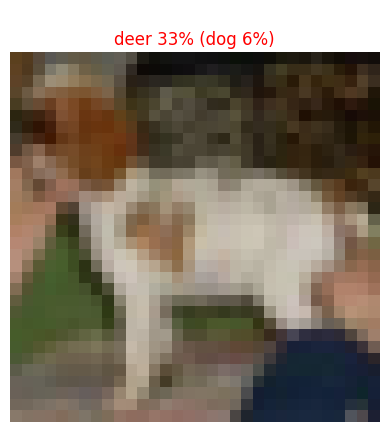

In [337]:
data = ft_cifar10_data()
ft_check_prediction("my_model_improved.keras",class_names, data)